# **3장 단순회귀모형**

In [2]:
# 기본적인 모듈 import

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

%matplotlib inline

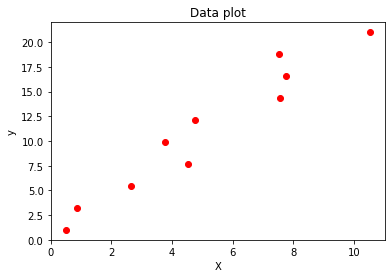

In [3]:
# 임의의 샘플 데이터 생성
# y = 2x + 1 + e
np.random.seed(42)

x = [int(i) + np.random.randn(1) for i in np.linspace(0, 10, 10)]
y = [2 * i + 1 for i in np.linspace(0, 10, 10)]
plt.title('Data plot')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(x, y, color='red')
plt.show()


# **단순 회귀모형 prediction**

In [4]:
# 단순회귀모형 결과 확인

reg = LinearRegression()
model = reg.fit(x, y)
print('Coef')  # x 앞에 붙어 있는 계수
print(model.coef_)
print('intercept') # y절편
print(model.intercept_)
print()

# 반올림
print(f'Coef : {np.round(model.coef_, 0)} \nIntercept : {np.round(model.intercept_, 0)}')

Coef
[1.99748379]
intercept
0.9165797765962953

Coef : [2.] 
Intercept : 1.0


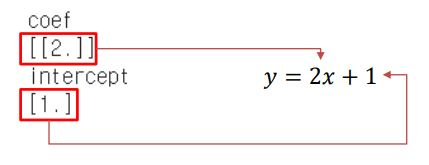

In [5]:
# 학습된 모델의 예측 결과
# x = 15, y = ?

model.predict([[15]])

array([30.87883657])

# **단순 회귀모형 visualization**

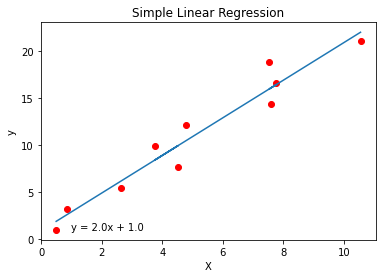

In [6]:
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(x, y, color = 'red')
plt.plot(x, model.coef_* x + model.intercept_)
plt.text(1, 1, 'y = ' + str(np.round(model.coef_[0], 0)) + 'x + ' + str(np.round(model.intercept_, 0)) ) # 1,1 (1,1) 위치에 식을 쓰겠다
plt.show()



--------------------------------------------------------------------------





# **실제 데이터에 적용해보기**

In [7]:
from sklearn.datasets import load_diabetes
'''
Diabetes dataset

-- X : 당뇨병 환자 442명에 대한 '나이', '성별', 'bmi', '혈압' 등 10 가지의 정보
-- y : 당뇨병 진행도
'''

dataset = load_diabetes()
X = dataset.data
y = dataset.target

# Feature matrix, target vector의 shape 확인

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

# Feature matrix의 각 feature 이름 확인
print(f'Features : {dataset.feature_names}')

X shape : (442, 10)
y shape : (442,)
Features : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
# Dataframe 형태로 보기

df = pd.DataFrame(X, columns = dataset.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


# **BMI를 이용한 단순 선형회귀**
$y = a*bmi + b$

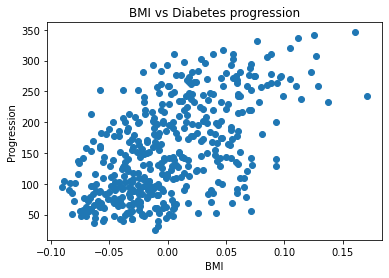

In [9]:
# Data plot

bmi = df.bmi.array

plt.title('BMI vs Diabetes progression')
plt.scatter(bmi, y)
plt.xlabel('BMI')
plt.ylabel('Progression')
plt.show()

In [10]:
# Linear model Fit
reg = LinearRegression()
model = reg.fit(bmi.reshape(-1, 1), y)
print(f'Coef : {model.coef_} \nIntercept : {model.intercept_}')
pred = reg.predict(bmi.reshape(-1, 1))

Coef : [949.43526038] 
Intercept : 152.1334841628967


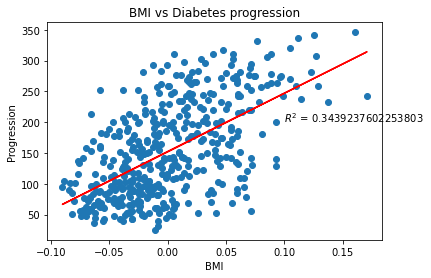

In [11]:
# Linear model plot

plt.title('BMI vs Diabetes progression')
plt.scatter(bmi, y)
plt.xlabel('BMI')
plt.ylabel('Progression')
plt.plot(bmi, pred, color='red')
plt.text(0.1, 200, '$R^2$ = ' + str(model.score(bmi.reshape(-1, 1), y)))
plt.show()

# **모든 feature 사용한 다중 선형회귀**
$y = \alpha * X + \beta$

In [12]:
# Linear model Fit

reg = LinearRegression()
model = reg.fit(X, y)
print(f'Coef : {model.coef_} \nIntercept : {model.intercept_}')
pred = model.predict(X)

Coef : [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639] 
Intercept : 152.1334841628965


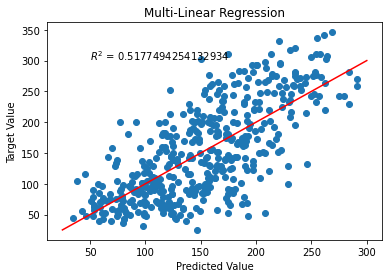

In [13]:
# Linear model plot

a = np.linspace(25, 300)
plt.plot(a, a, color='red')
plt.title('Multi-Linear Regression')
plt.scatter(pred, y)
plt.xlabel('Predicted Value')
plt.ylabel('Target Value')
plt.text(50, 300, '$R^2$ = ' + str(model.score(X, y)))
plt.show()



---





# **실습 1**
- Boston Dataset에서 변수 CRIM과 target의 데이터 산점도를 시각화하세요

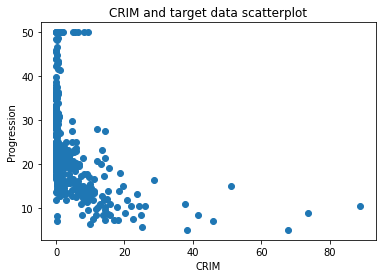

In [14]:
# Data 불러오기

import warnings
warnings.filterwarnings(action='ignore')
from sklearn.datasets import load_boston

dataset = load_boston()
X = dataset.data
y = dataset.target

df = pd.DataFrame(X, columns = dataset.feature_names)
df

CRIM = df.CRIM.array

plt.title('CRIM and target data scatterplot')  
plt.scatter(CRIM, y)
plt.xlabel('CRIM')
plt.ylabel('Progression')
plt.show()

# **실습 2**
- Boston Dataset에서 전체 변수를 사용하여 선형회귀 모델을 학습시키고 그 결과를 시각화하세요

파일명 **'머신러닝_실습_3장_선형회귀분석_학번_이름'**으로 **.ipynb** 파일 다운로드하여 이클래스에 제출해 주세요

Coef : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 
Intercept : 36.459488385090125


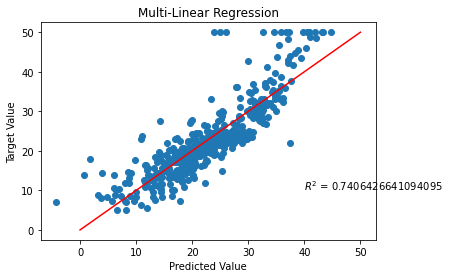

In [15]:
# Linear model Fit

reg = LinearRegression()
model = reg.fit(X, y)
print(f'Coef : {model.coef_} \nIntercept : {model.intercept_}')
pred = model.predict(X)

# Linear model plot

a = np.linspace(0, 50)
plt.plot(a, a, color='red')
plt.title('Multi-Linear Regression')
plt.scatter(pred, y)
plt.xlabel('Predicted Value')
plt.ylabel('Target Value')
plt.text(40, 10, '$R^2$ = ' + str(model.score(X, y)))
plt.show()



---




### **(참고) BostonHousing Dataset Feature 설명**

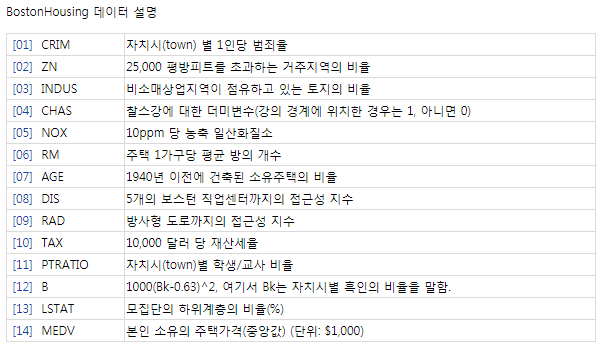

### **(참고) 파일명 바꾸는 법 & .ipynb 다운로드하는 법** 

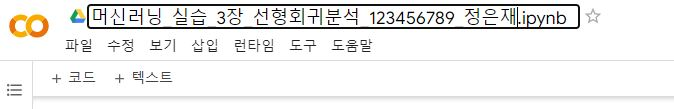

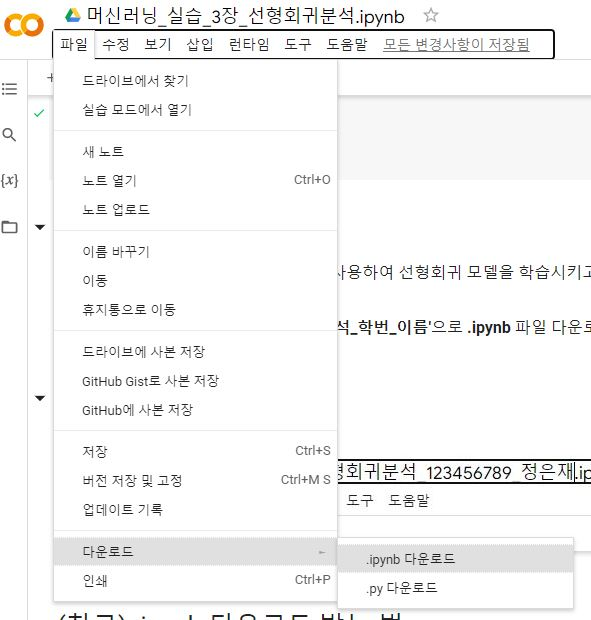